In [1]:
import os
import pandas as pd
from data.visualize import visualize_dataset
import numpy as np

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [2]:
def get_stock_df(df_all: pd.DataFrame, stock: str) -> pd.DataFrame:
    df = df_all[df_all['stock'] == stock]
    return df

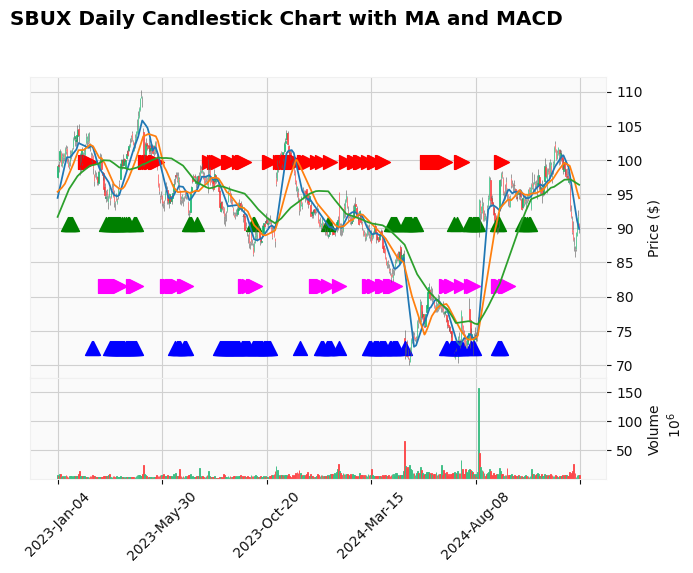

In [4]:
def load_data_file(csv_file):
    if not os.path.exists(csv_file):
        raise FileNotFoundError(
            f"Please run data_fetcher.py to download the data first.")
    else:
        df = pd.read_csv(csv_file)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    return df

df_test = load_data_file("data/stock_testing_2023-01-01_2024-12-31.csv")
df_test = get_stock_df(df_test, "SBUX")
        
visualize_dataset(df_test,
                stock="SBUX",
                viz_labels=["trend_30days+", "trend_30days-"],
                viz_pred=True,
                plot_macd=False)

In [5]:
def get_false_predictions(df, label_name, positive=True):
    pred = 1 if positive else 0
    row_indices = df.index[df[label_name+"_pred"] == pred]
    gt_labels = df[label_name].loc[row_indices]
    dates = []
    for date, gt in gt_labels.items():
        if not np.isnan(gt) and gt != pred:
            dates.append(date.strftime("%Y-%m-%d"))
    print("# of false predictions: ", len(dates))
    print(dates)
get_false_predictions(df_test, "trend_30days+", positive=False)

# of false predictions:  30
['2023-03-13', '2023-03-15', '2023-03-16', '2023-07-07', '2023-07-10', '2023-07-11', '2023-07-18', '2024-04-15', '2024-05-02', '2024-05-03', '2024-05-06', '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-14', '2024-05-15', '2024-05-16', '2024-07-31', '2024-08-01', '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-12', '2024-09-06', '2024-10-10', '2024-10-14', '2024-10-15', '2024-10-17', '2024-10-21', '2024-10-22']


In [6]:
from data.label import label_columns, label_feature

In [9]:
start_date = "2023-05-01"
end_date = "2023-05-10"
columns = label_columns + [label + "_pred" for label in label_feature]
columns = [column for column in columns if "30" in column]
display(df_test.loc[start_date:end_date][columns])

,30days_max_close,30days_max_duration,30days_min_close,30days_min_duration,trend_30days+,trend_30days-,trend_30days+_pred,trend_30days-_pred
Date,,,,,,,,
2023-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-03,0.035237,15.0,-0.057276,29.0,0.0,0.0,0.0,0.0
2023-05-04,0.027724,14.0,-0.064118,28.0,0.0,0.0,0.0,0.0
2023-05-05,0.003854,13.0,-0.085854,27.0,0.0,1.0,0.0,0.0
2023-05-08,0.004229,10.0,-0.085513,24.0,0.0,1.0,0.0,0.0
2023-05-09,0.008558,9.0,-0.081571,23.0,0.0,1.0,0.0,0.0
2023-05-10,0.006107,8.0,-0.083803,22.0,0.0,1.0,0.0,0.0
